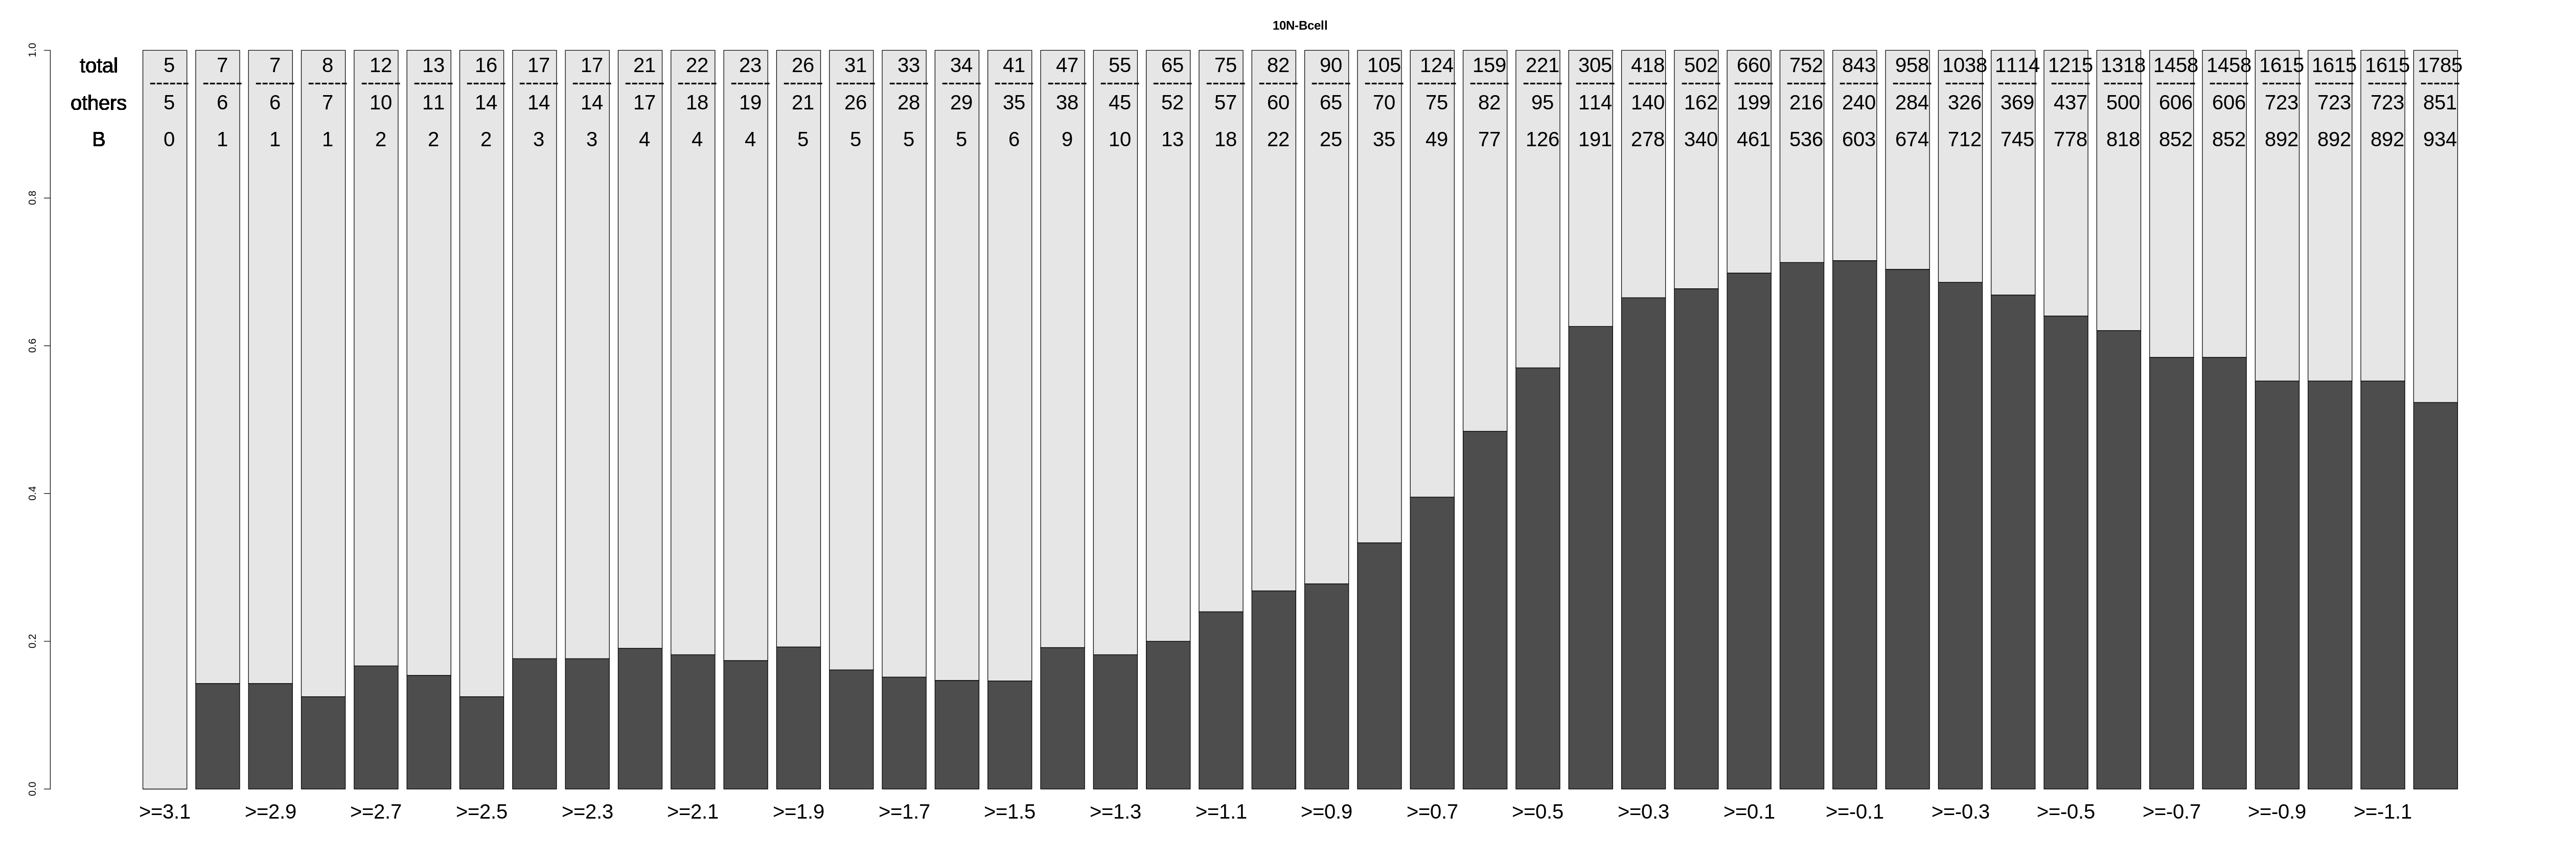

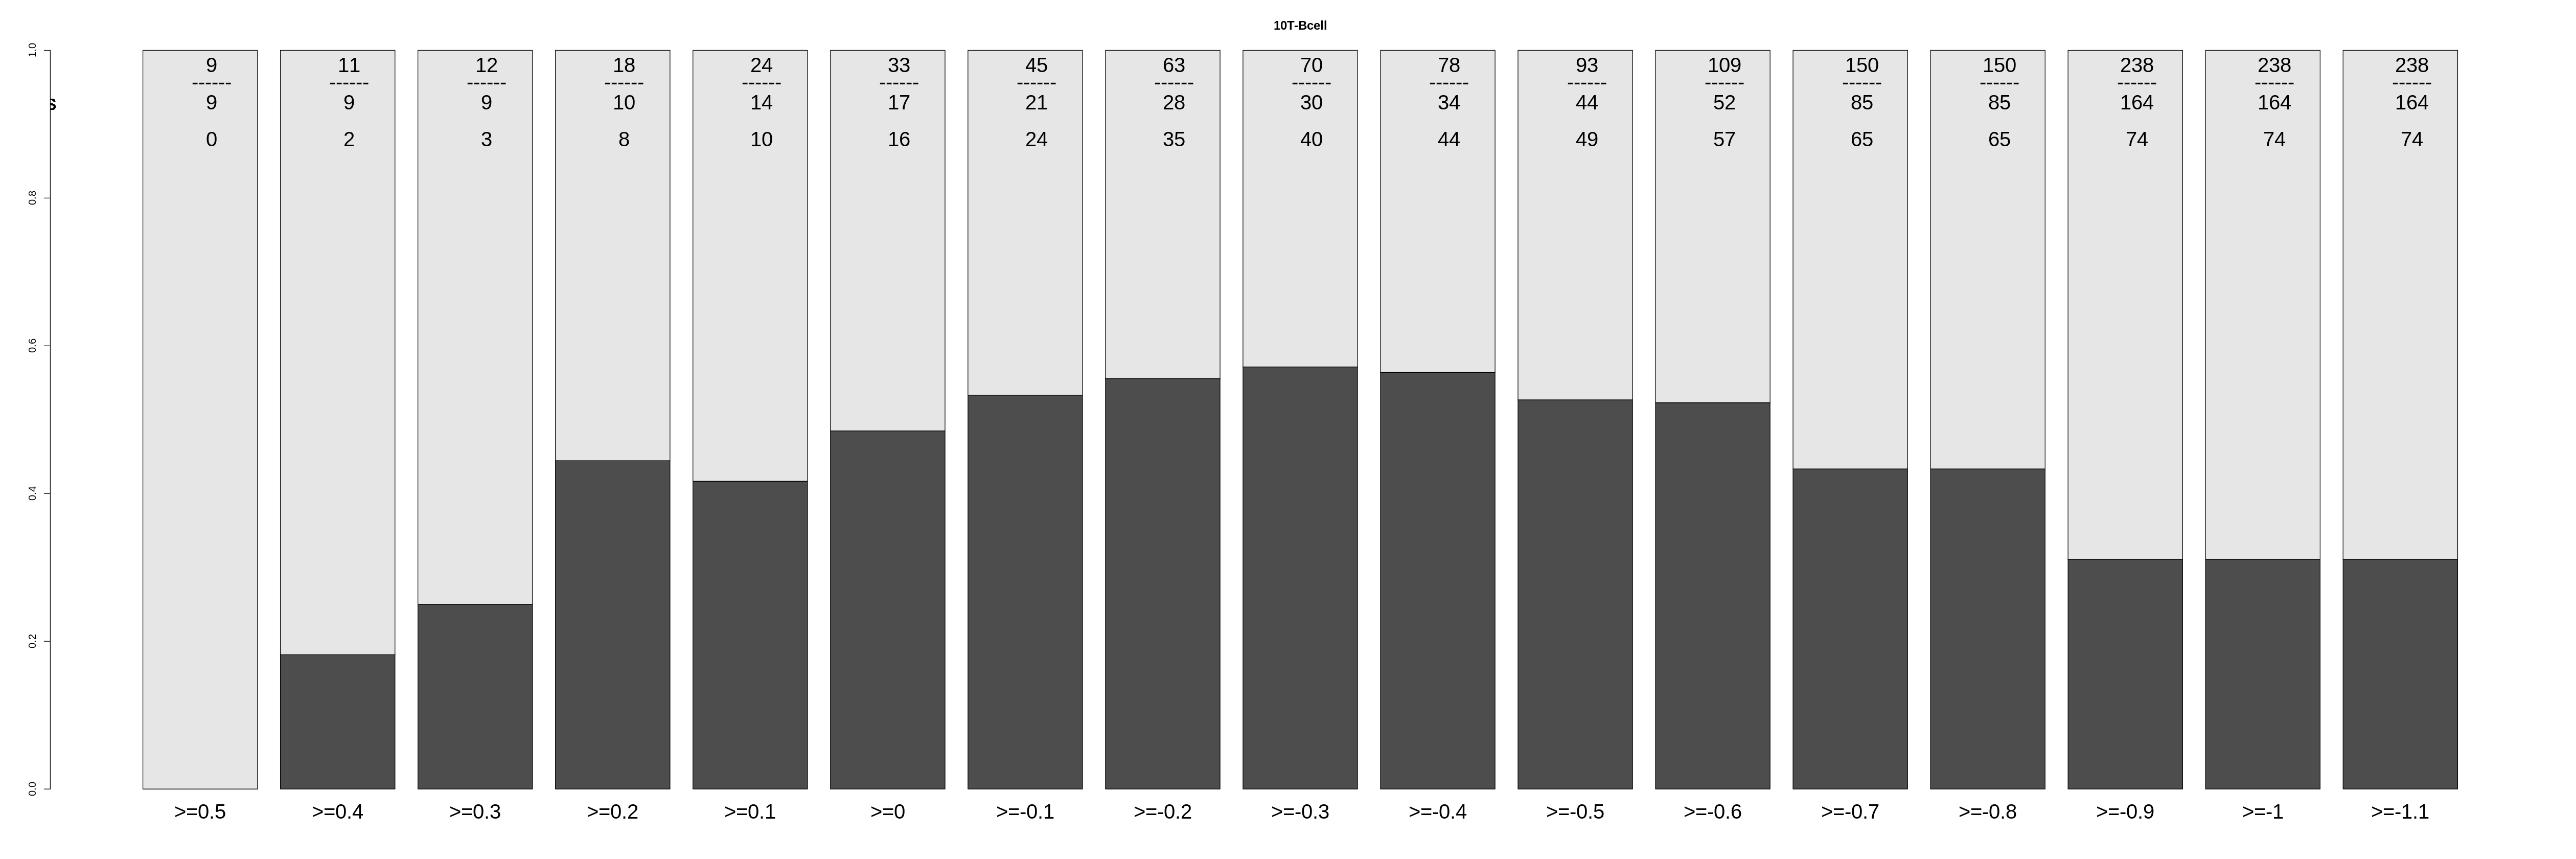

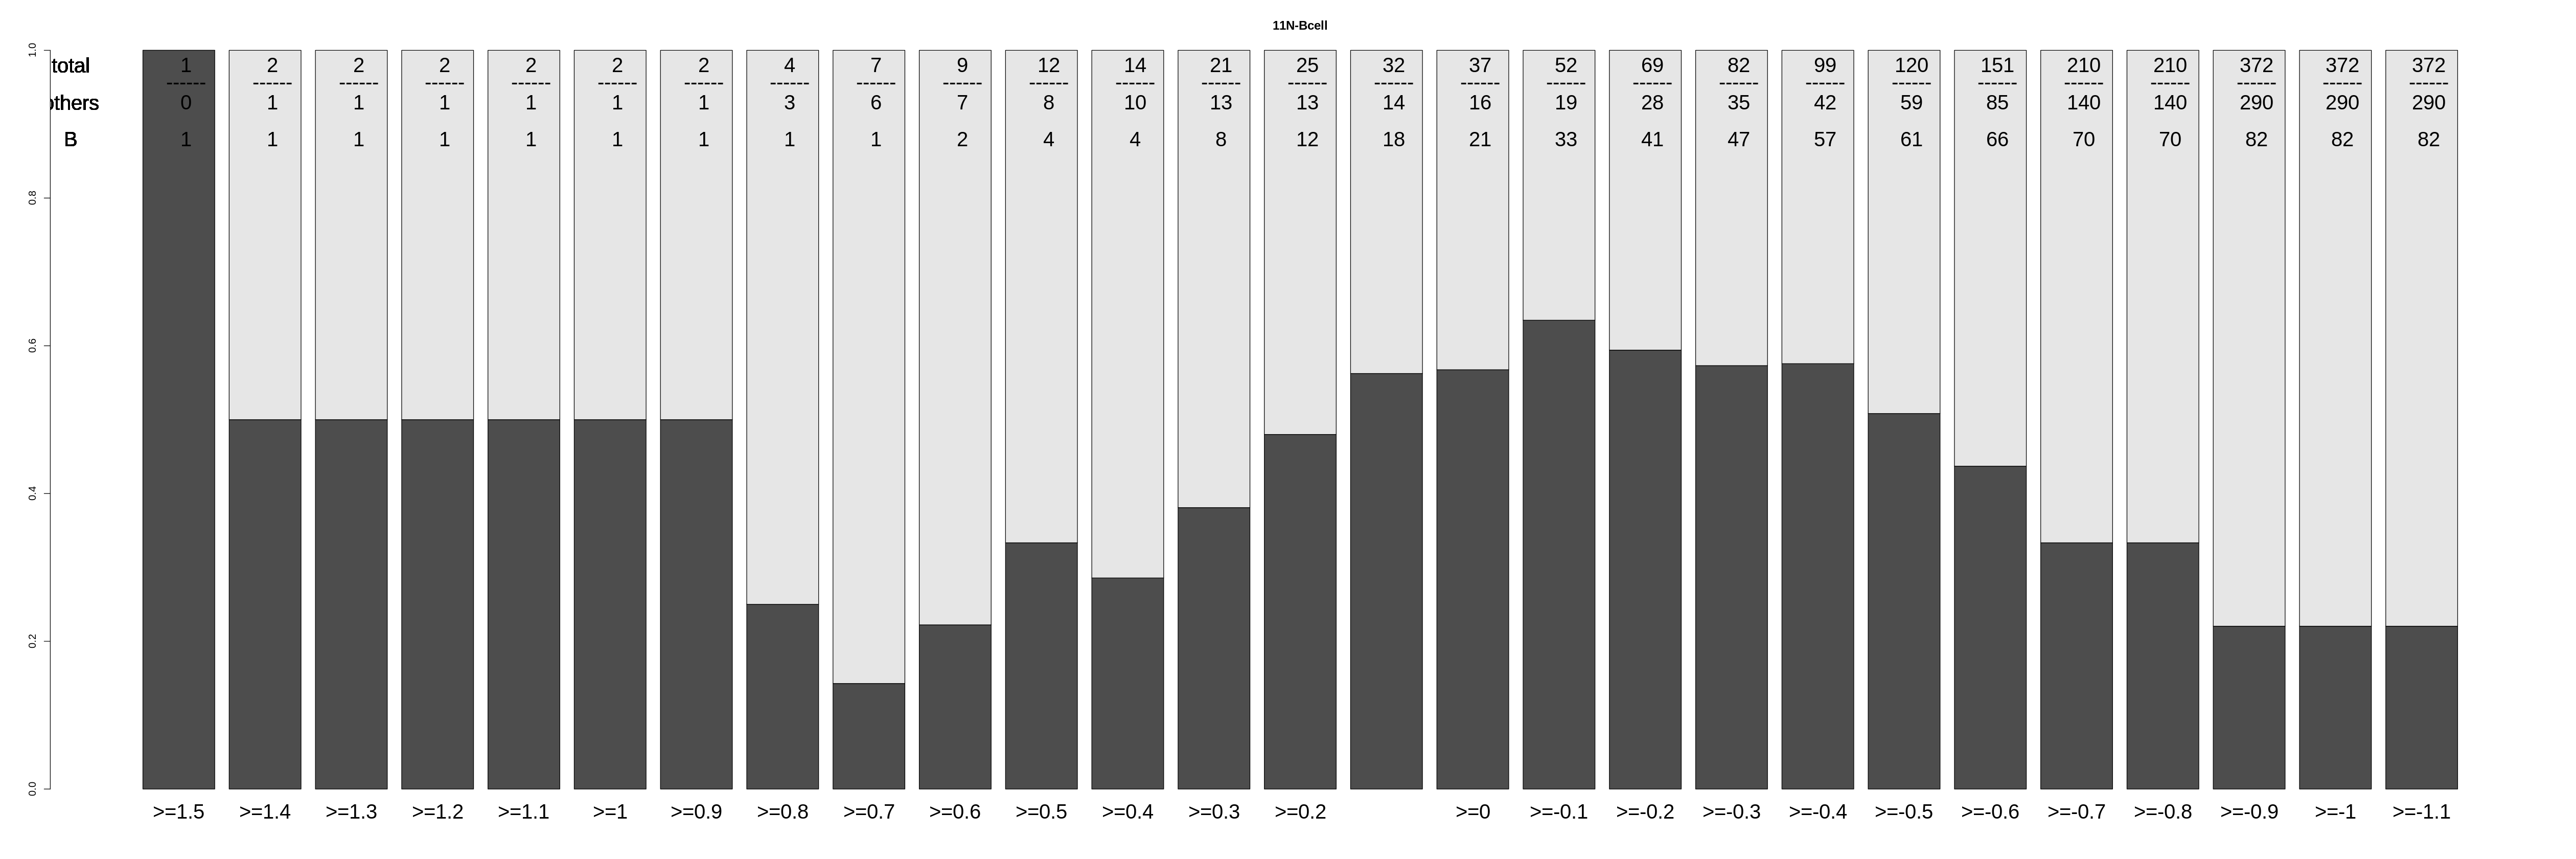

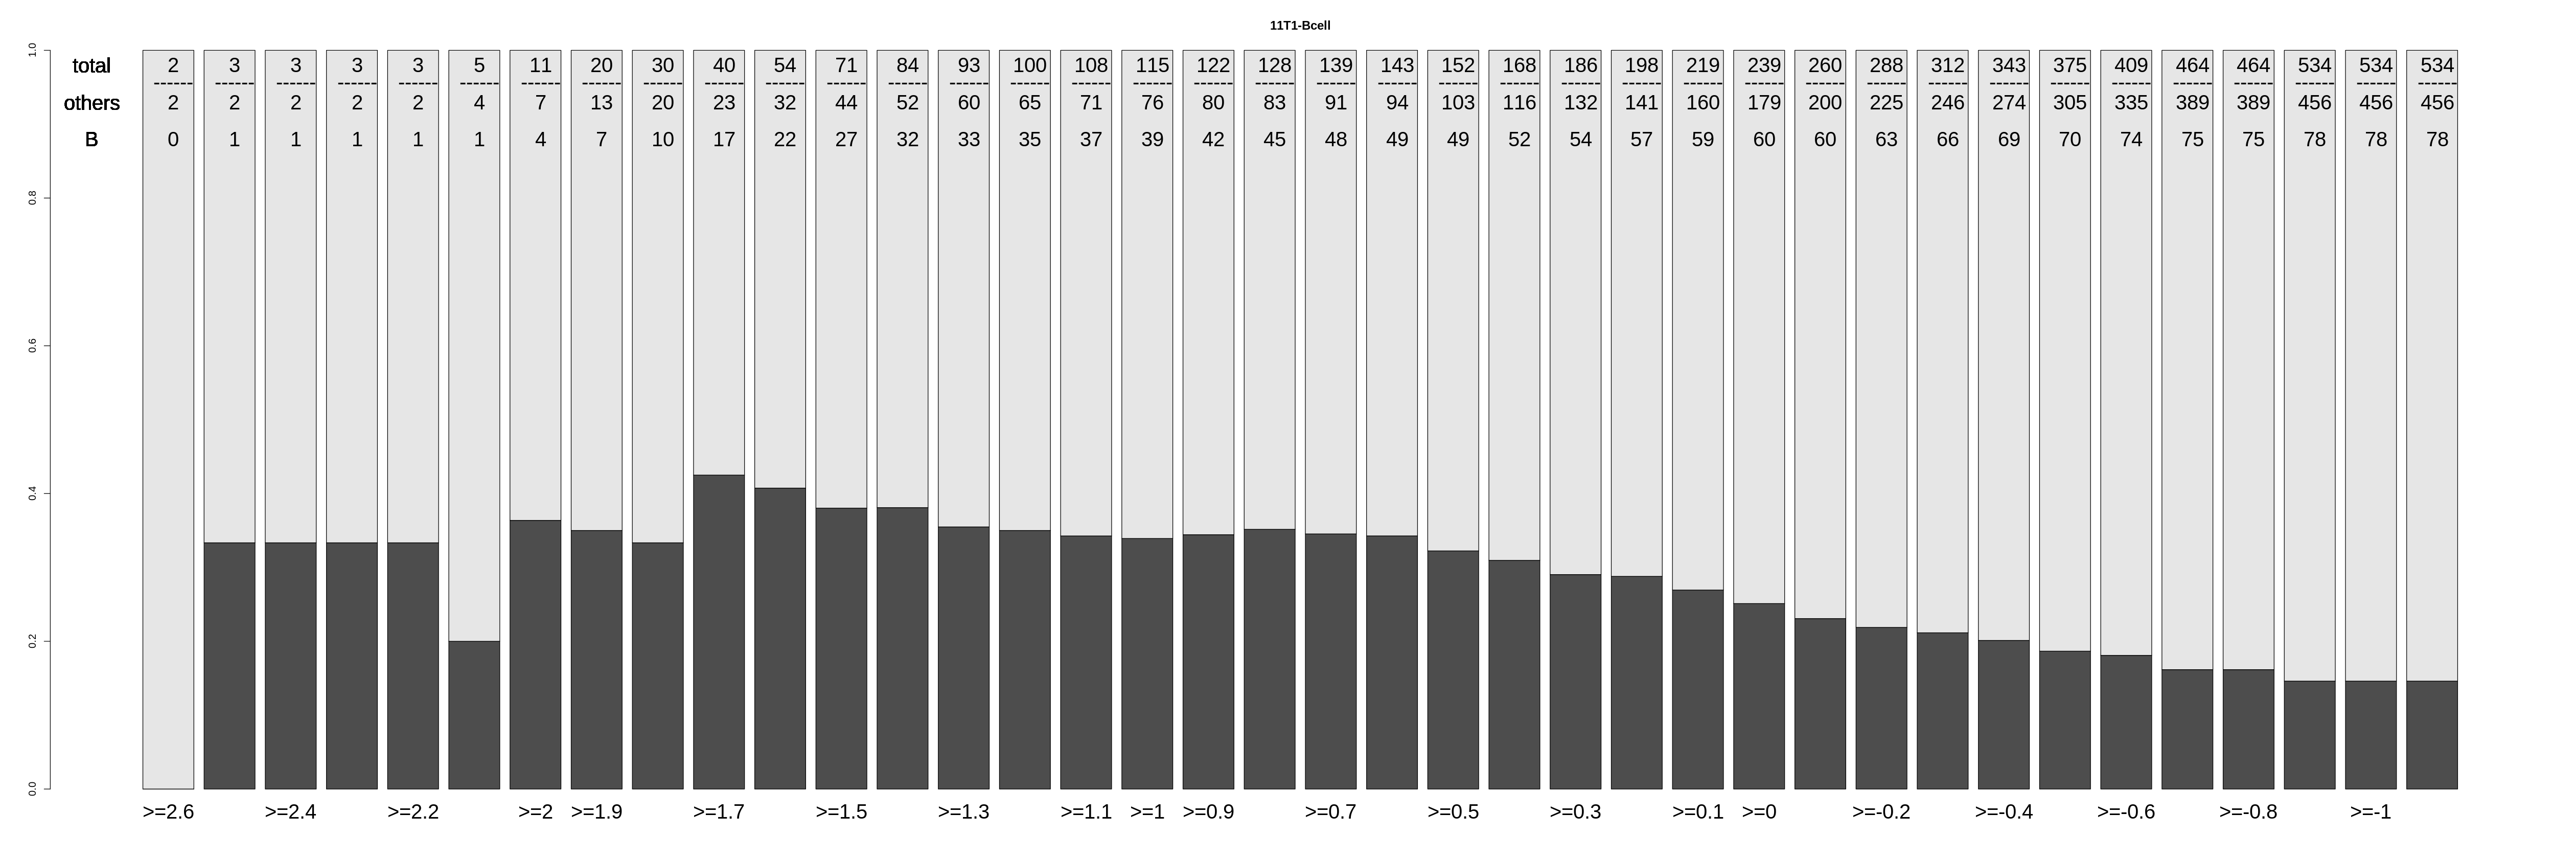

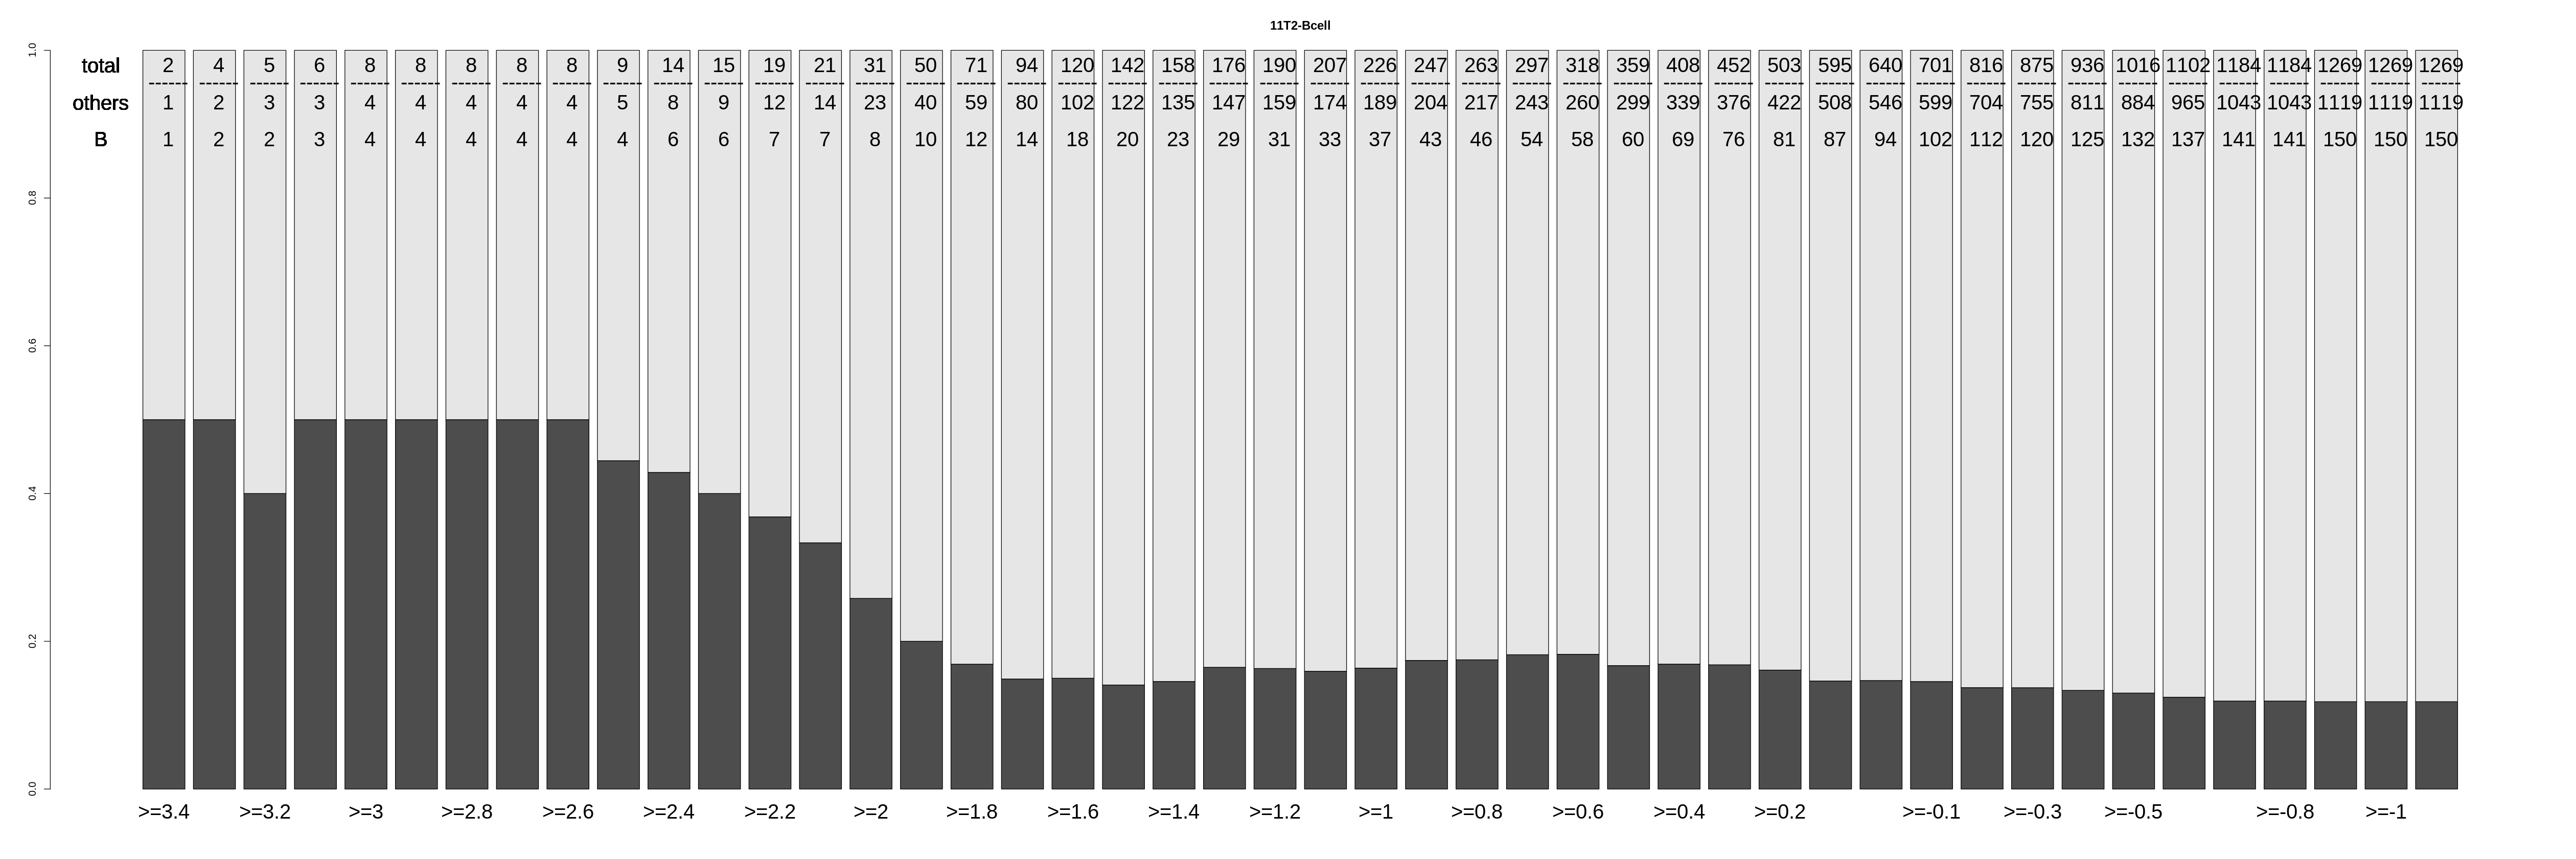

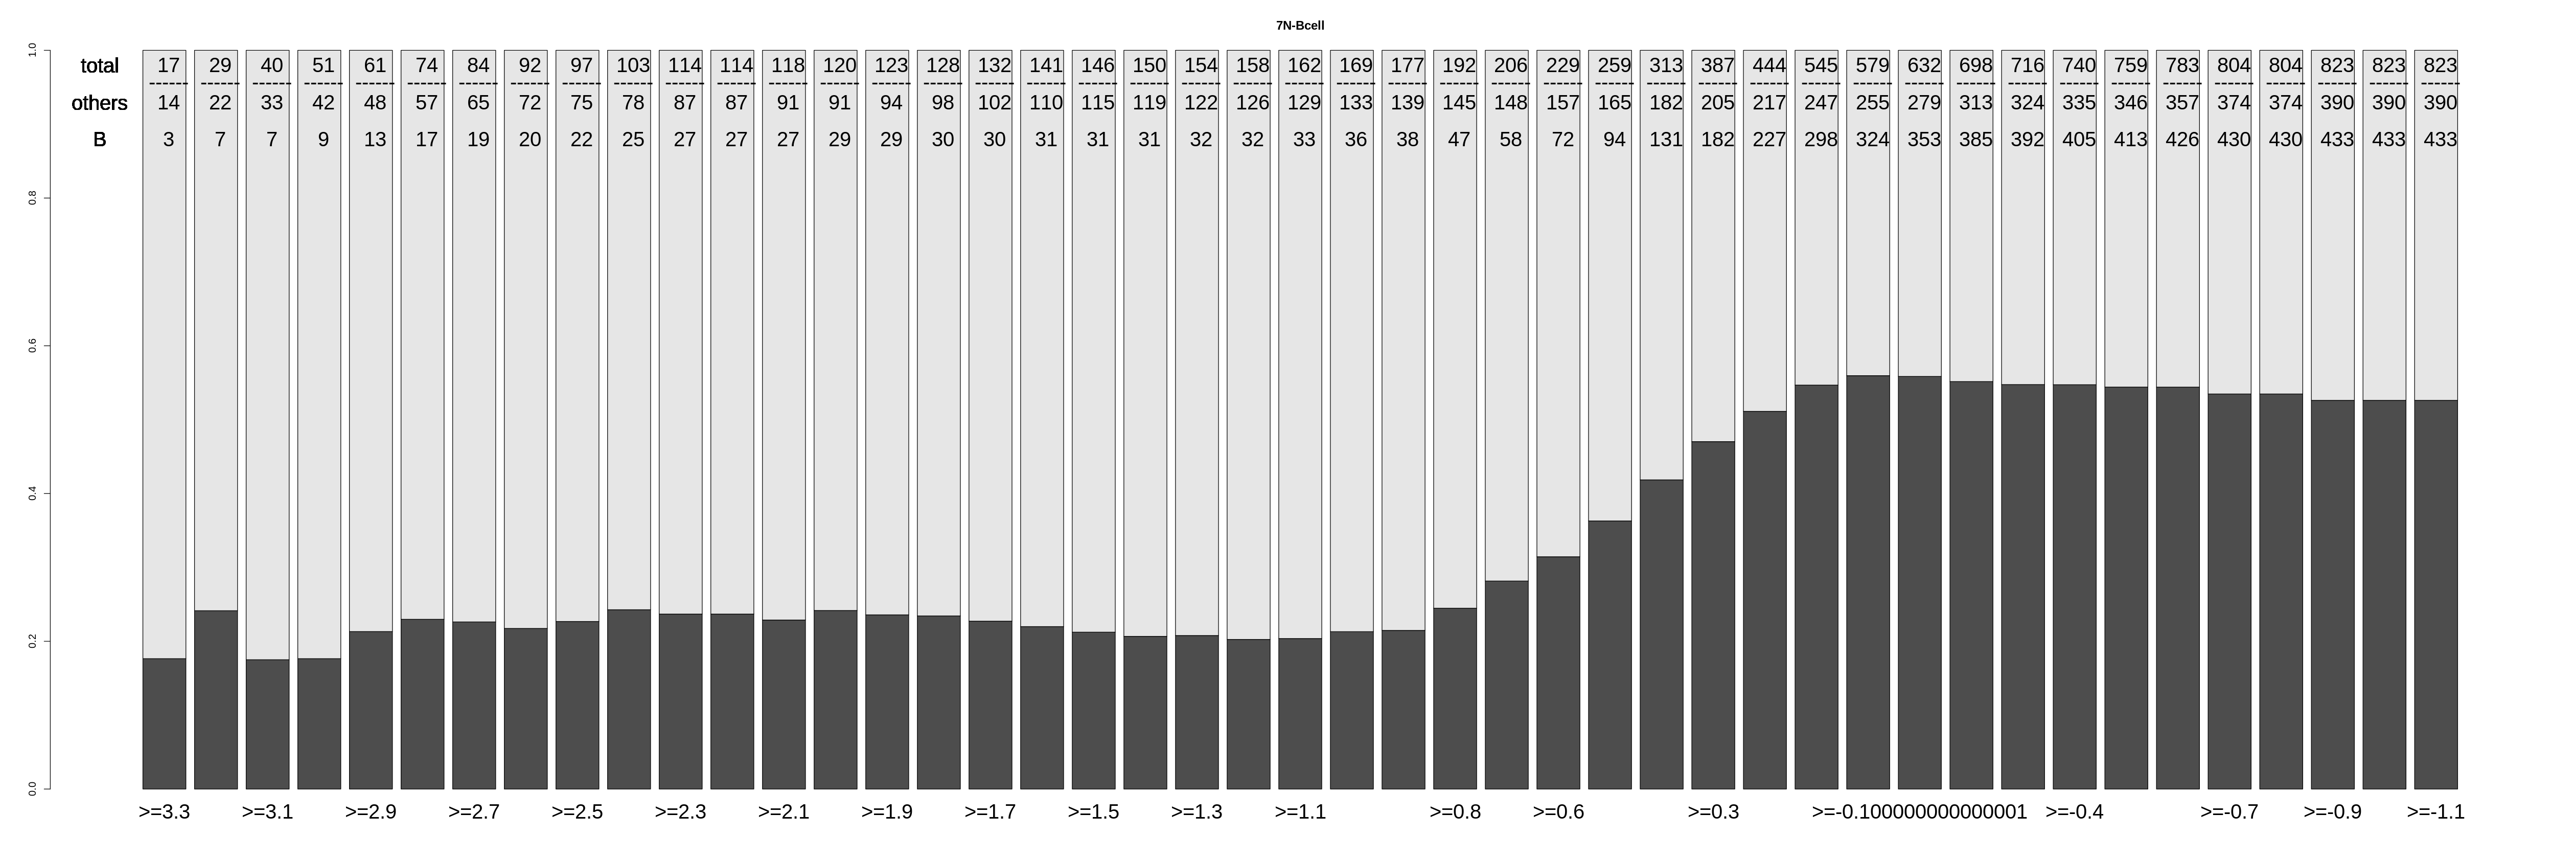

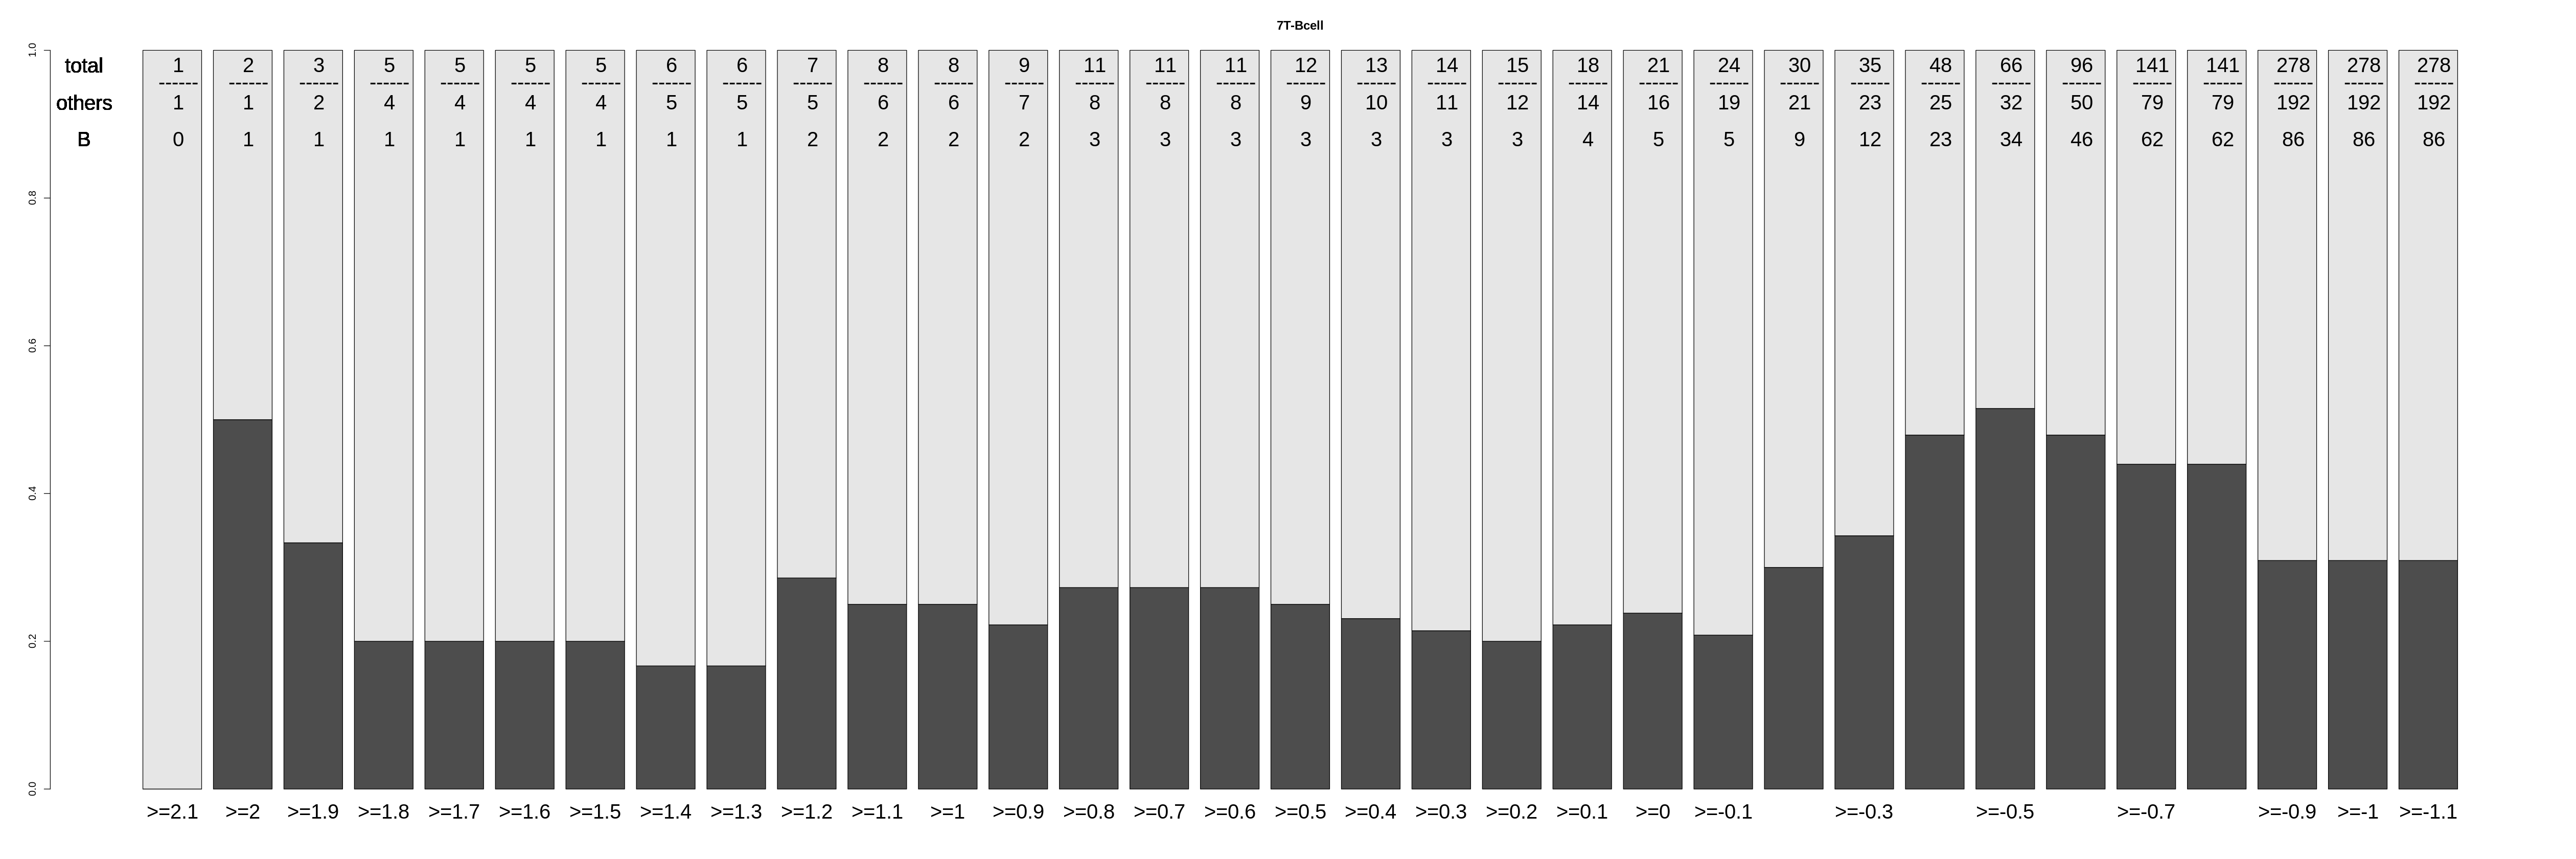

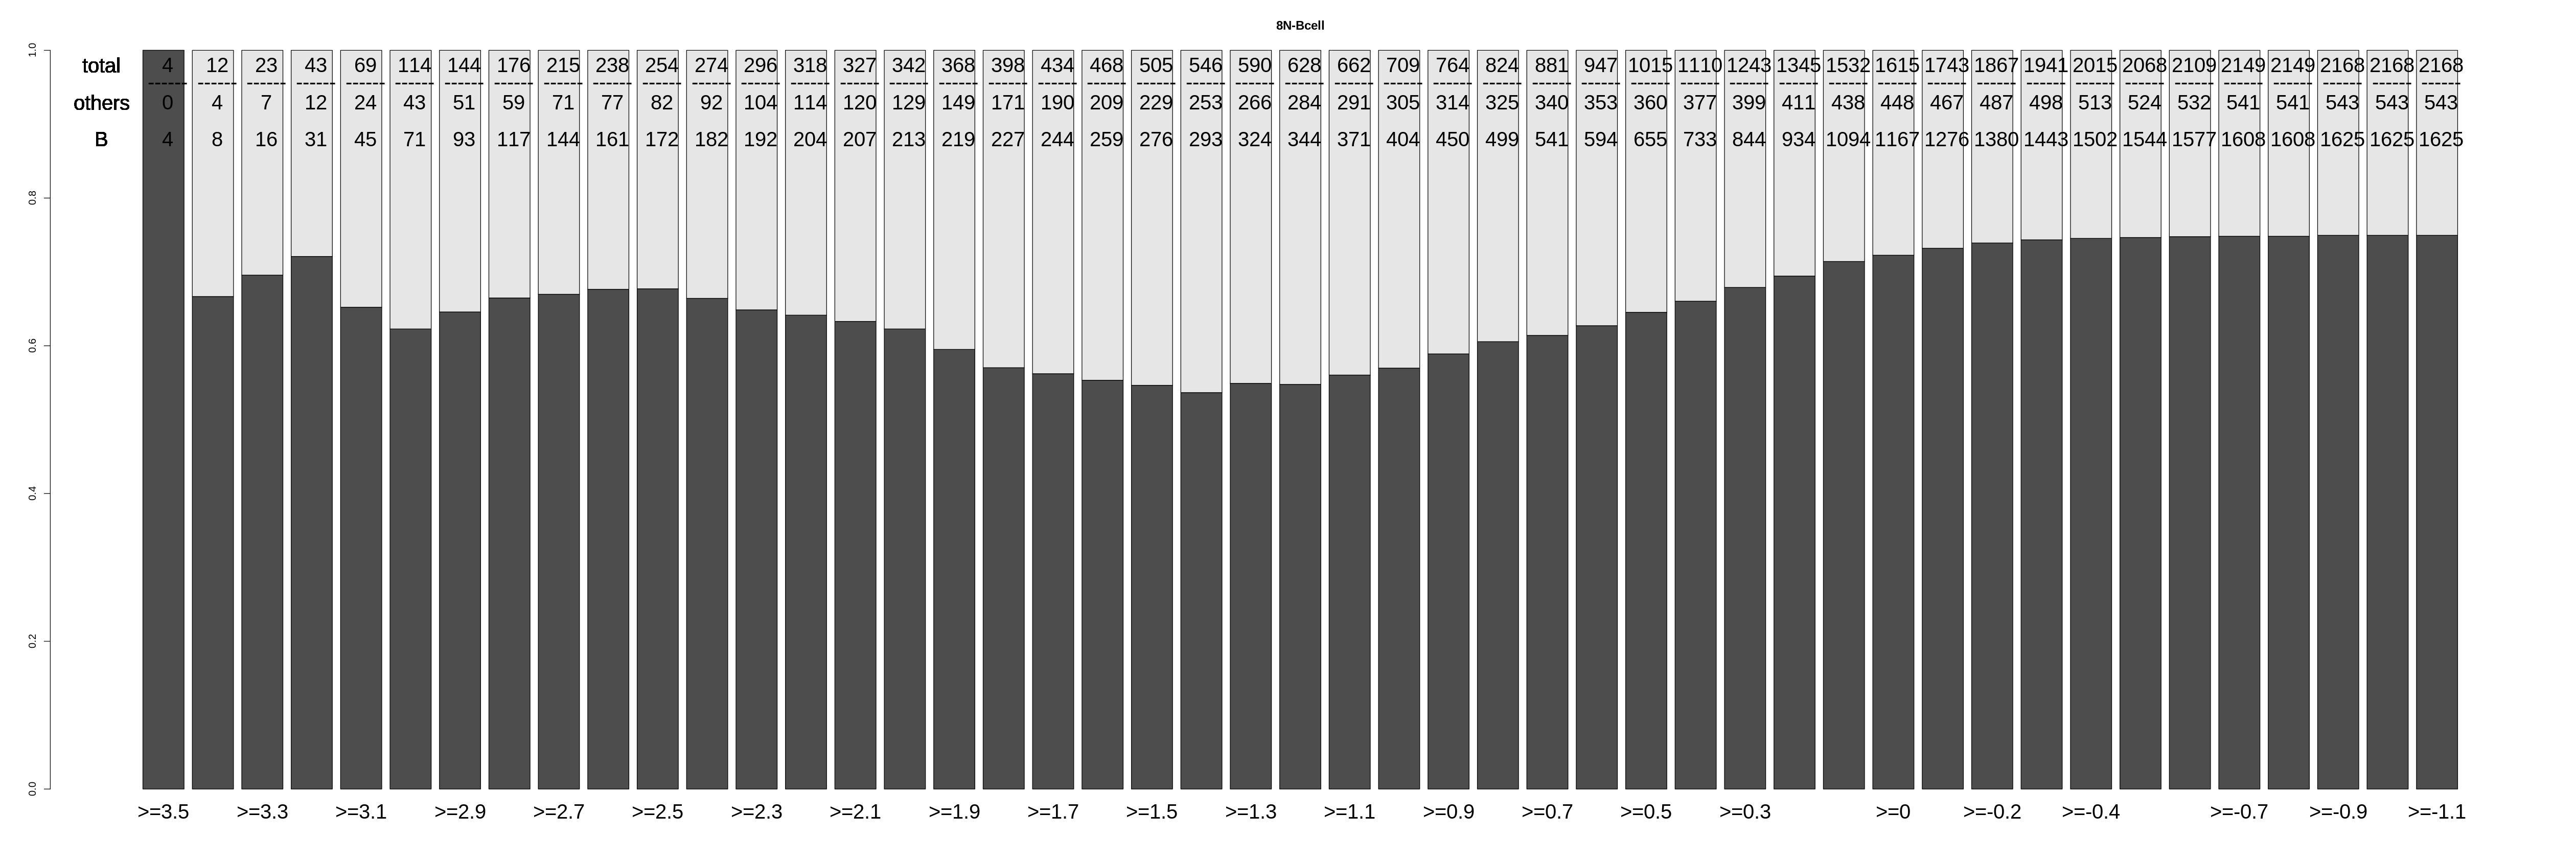

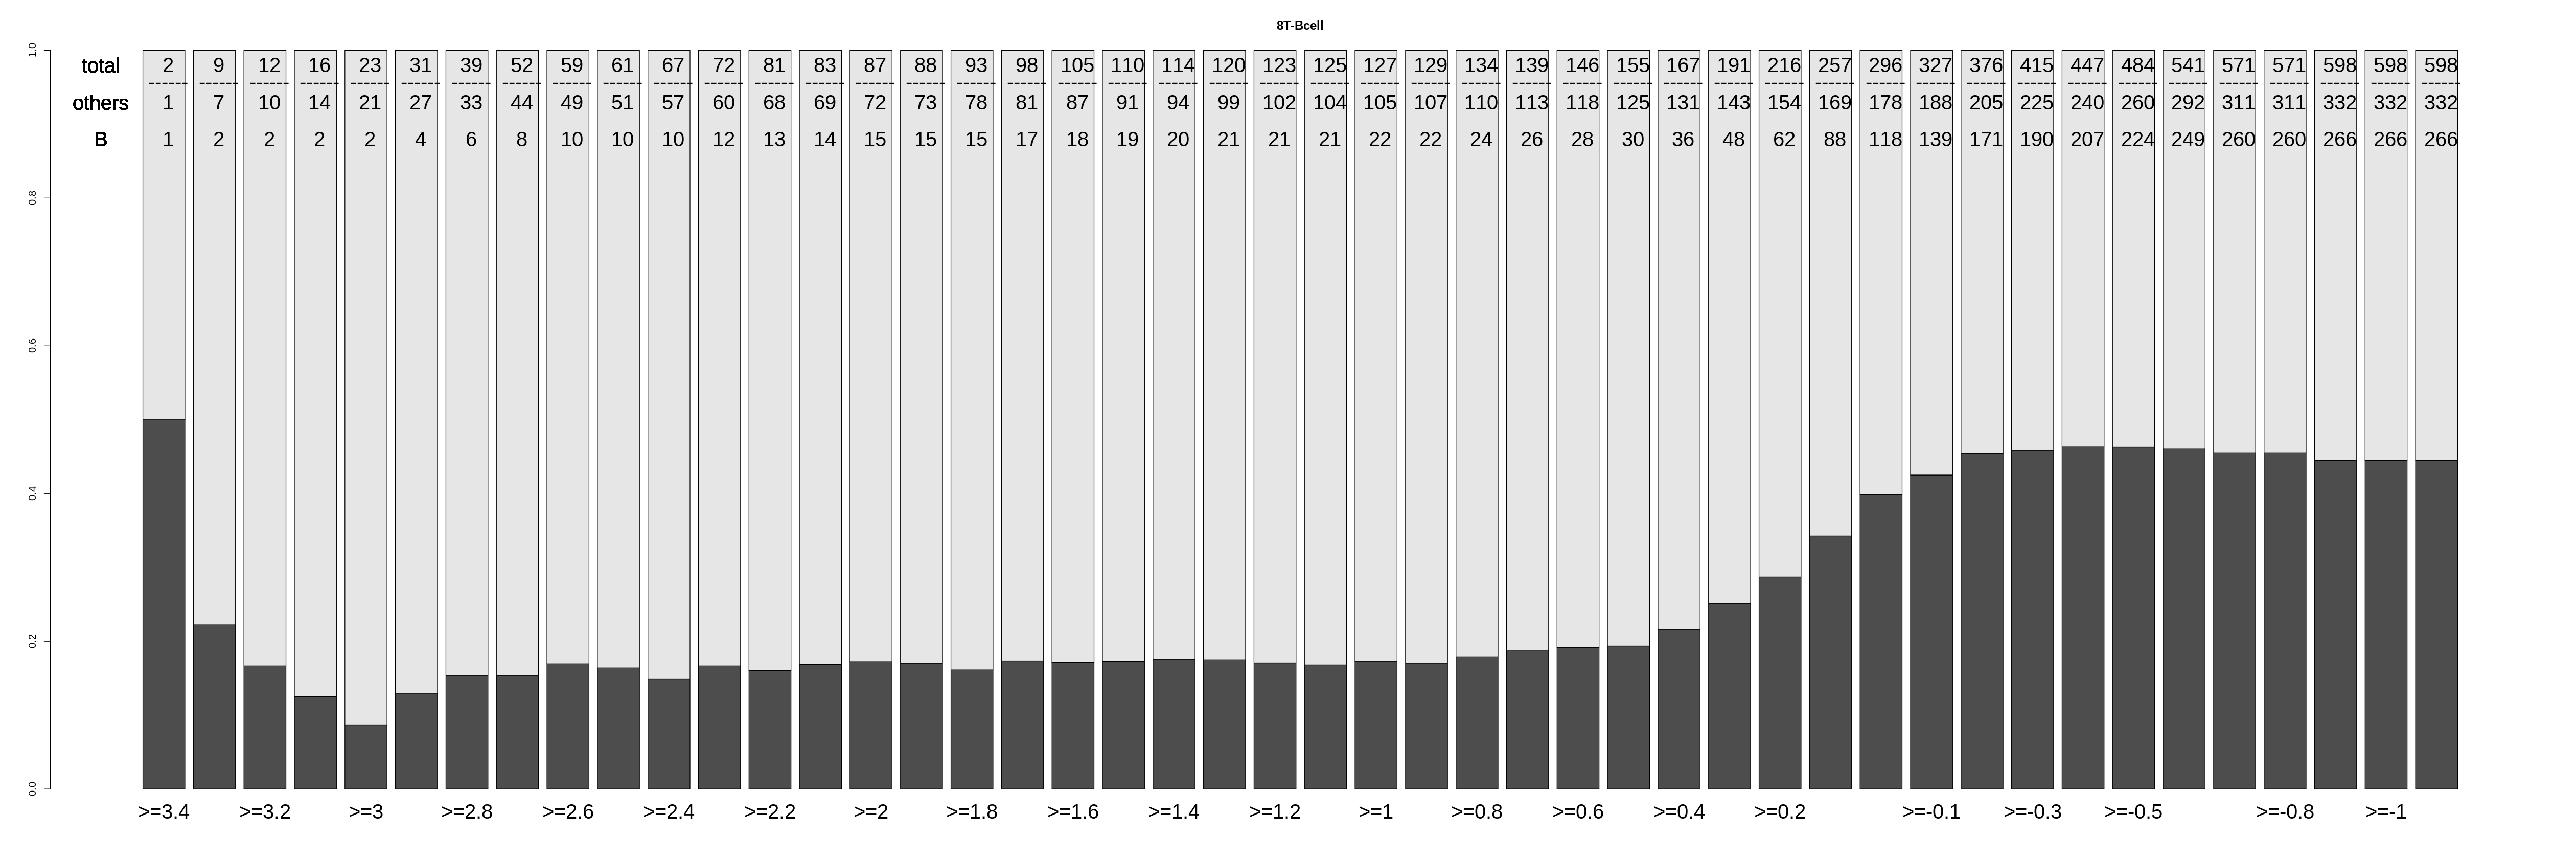

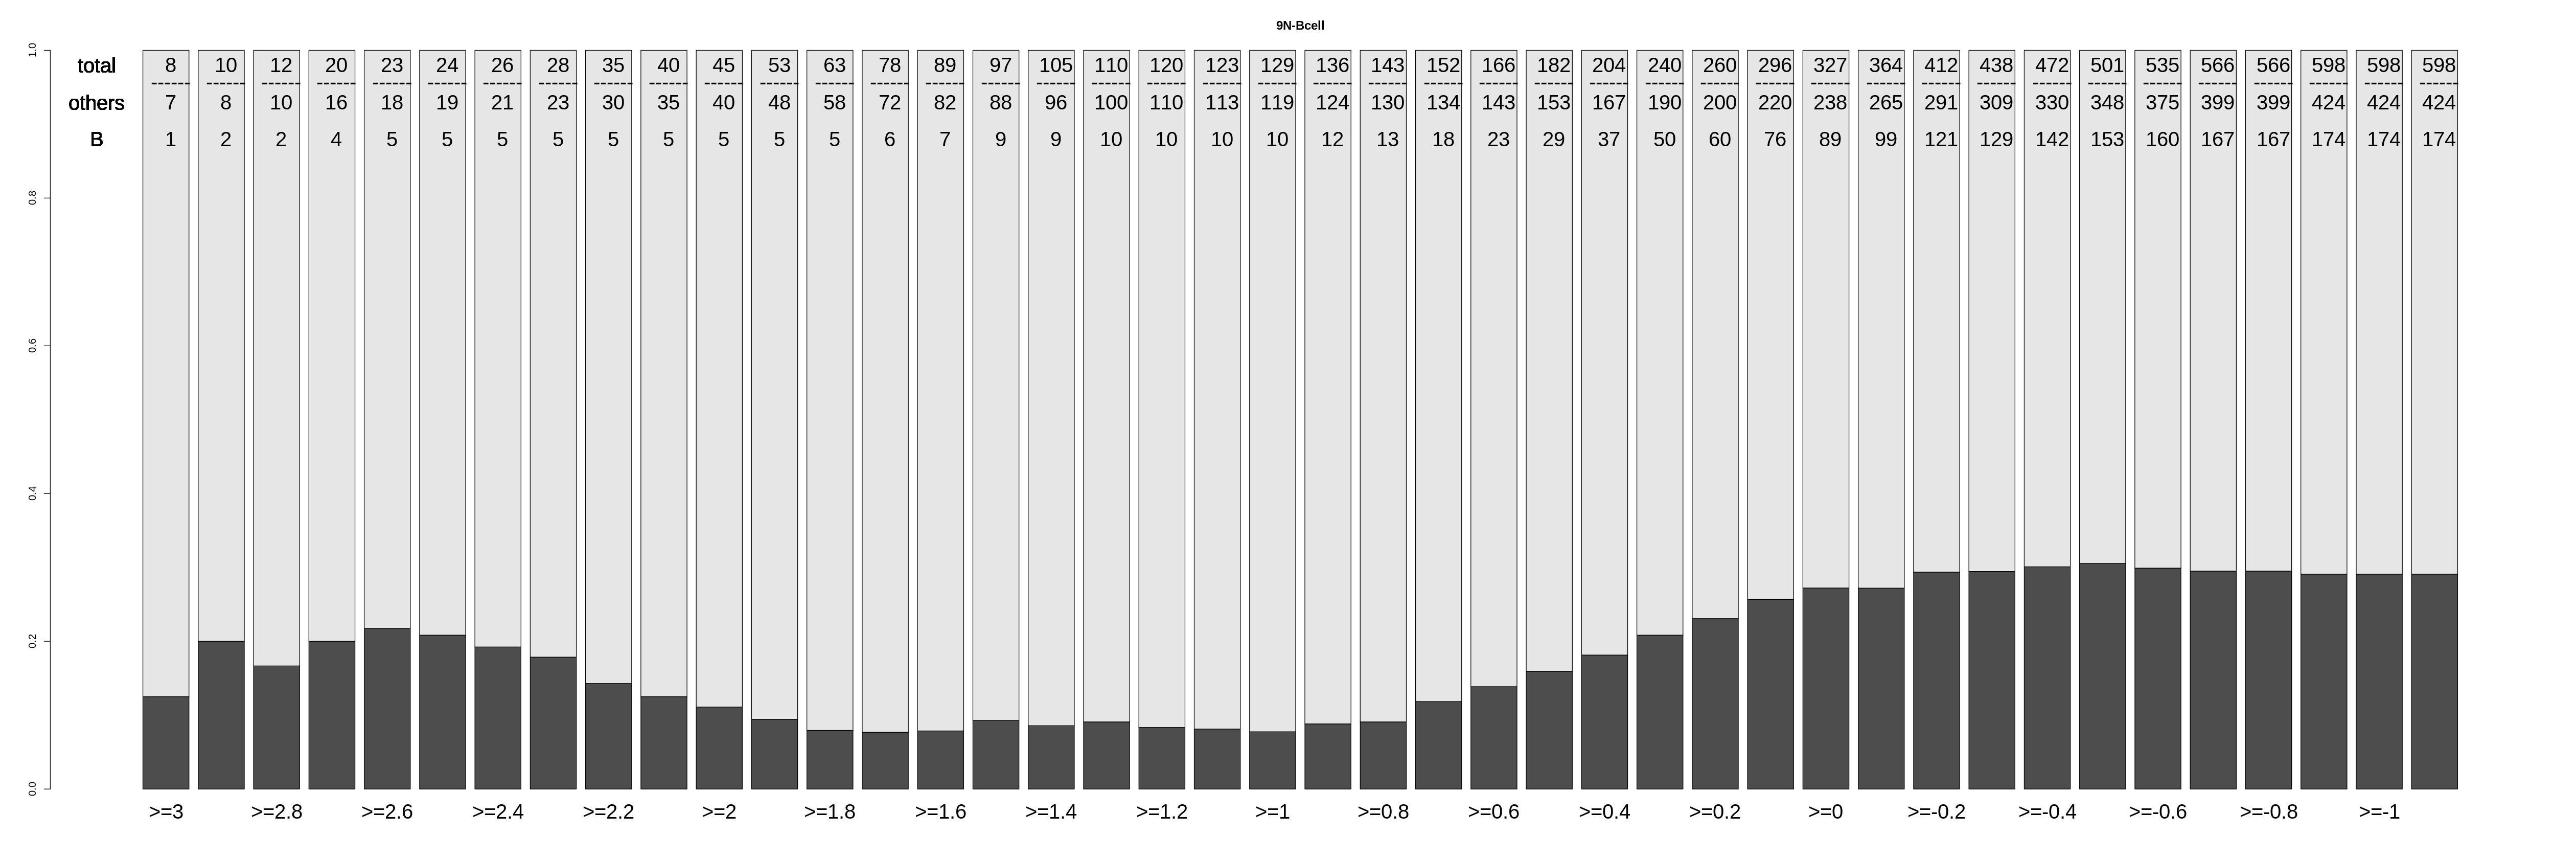

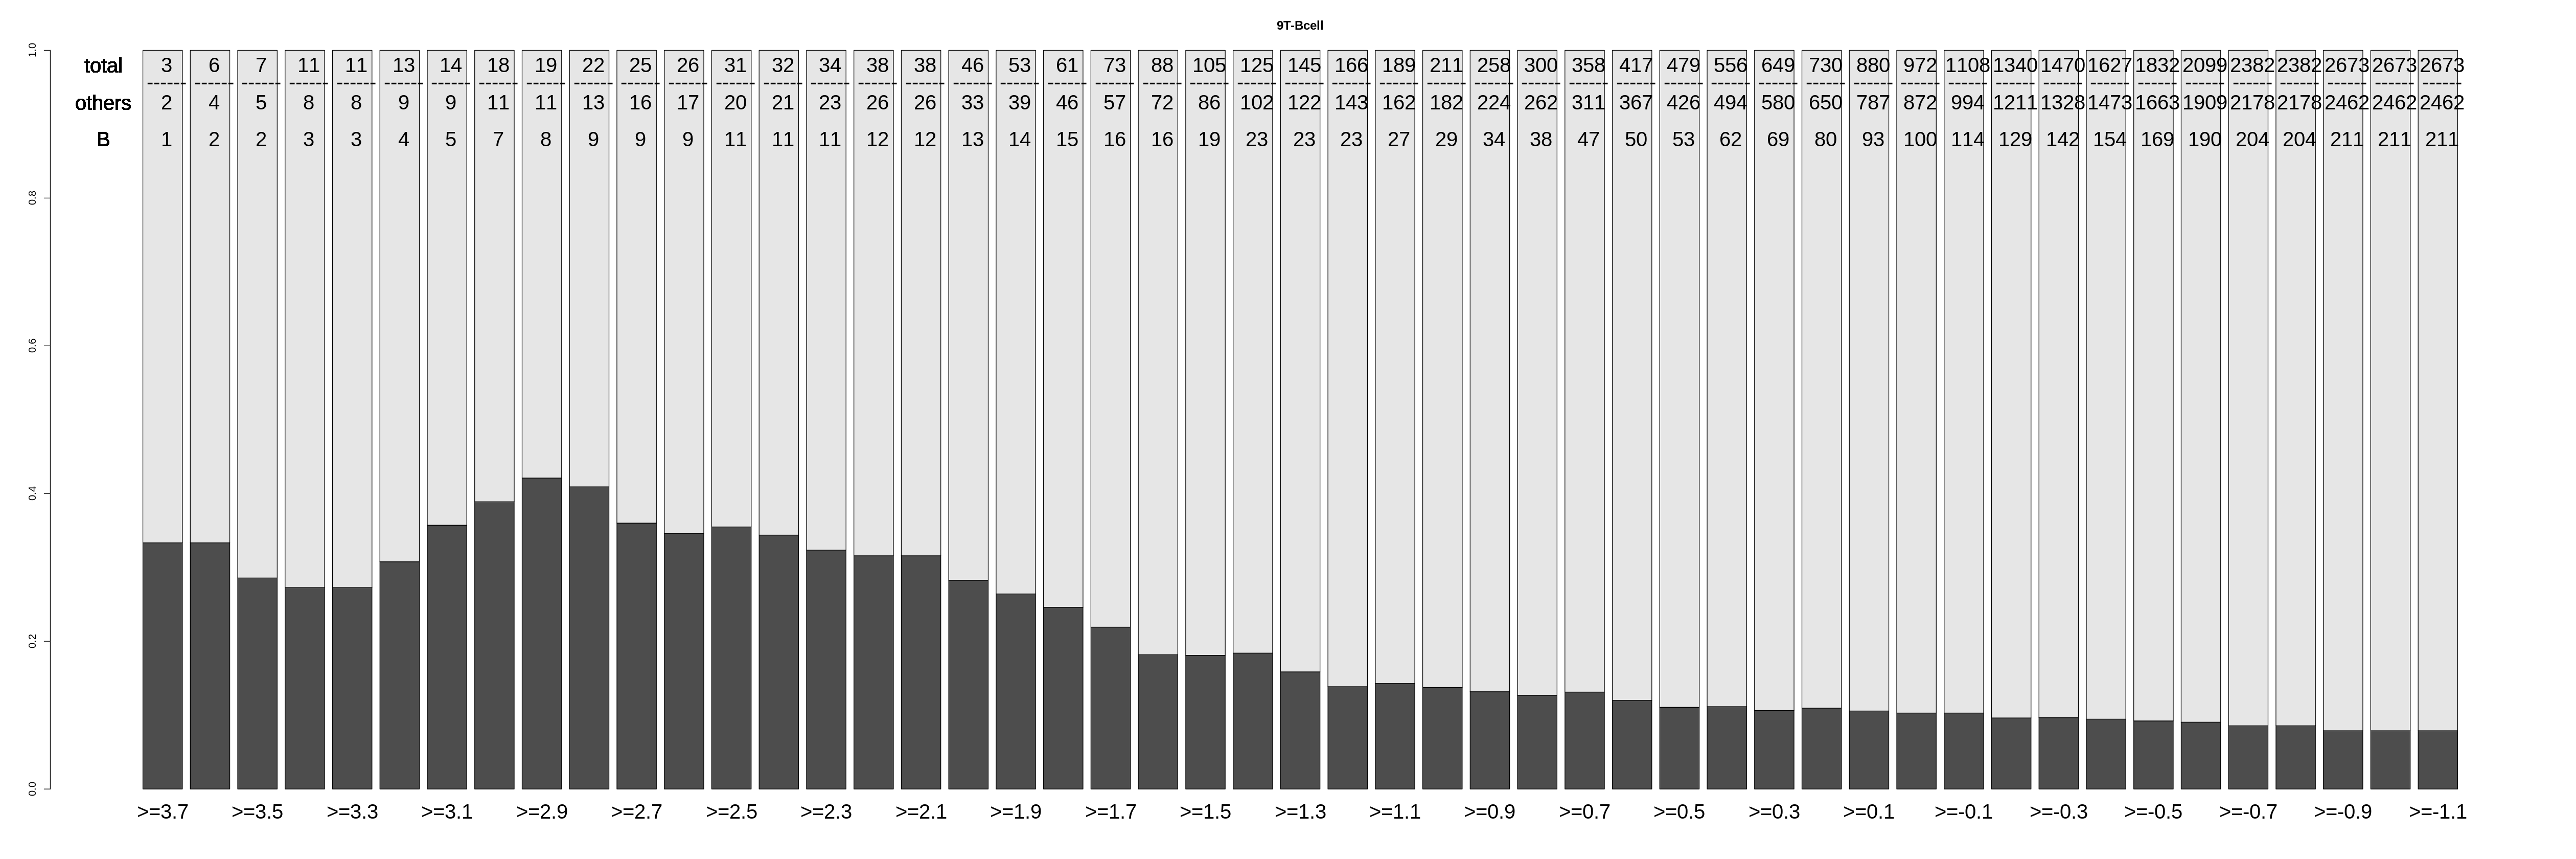

In [775]:
B <- c()
sumB <- c()
for(j in 1:length(unique(data.b.only.all@meta.data$orig.ident))){
data.b.only <- subset(data.b.only.all, idents =unique(data.b.only.all@meta.data$orig.ident)[j])
data.others <- subset(data.others.all, idents =unique(data.b.only.all@meta.data$orig.ident)[j])

labels <- c('B cell', 'Others')
color <- c('#FF00007F','#0000FF7F')


# 透過色を使う
#hist(data.b.only@meta.data$scaledlogUMIs,col="#FF00007F", ylim=c(0,600))
#hist(data.others@meta.data$scaledlogUMIs,col="#0000FF7F", add=T)

#legend("topright",legend=labels,col=color,pch=15,cex=1)

threshold1 <- round(min(max(data.b.only@meta.data$scaledlogUMIs),max(data.others@meta.data$scaledlogUMIs)),1)

A <- as.matrix(c(length(data.b.only@meta.data$scaledlogUMIs[data.b.only@meta.data$scaledlogUMIs>=threshold1,]),length(data.others@meta.data$scaledlogUMIs[data.others@meta.data$scaledlogUMIs>=threshold1,])))

threshold2 <- round(min(min(data.b.only@meta.data$scaledlogUMIs),min(data.others@meta.data$scaledlogUMIs)),1)

i <- 1
columns <- c(paste0('>=',threshold1))
while((threshold1-0.1*i )>= threshold2){
A <- cbind(A,c(length(data.b.only@meta.data$scaledlogUMIs[data.b.only@meta.data$scaledlogUMIs>=(threshold1-0.1*i),]),length(data.others@meta.data$scaledlogUMIs[data.others@meta.data$scaledlogUMIs>=threshold1-0.1*i,])))
columns <- c(columns, paste0('>=',as.character(threshold1-0.1*i)))
i <- i + 1
}

colnames(A) <- columns
rownames(A) <- c('B',"others")


options(repr.plot.width=42, repr.plot.height=14)

sums <- apply(A,2,sum)

B <- c(B,A)
sumB <- c(sumB,sums)
                      
barplot (x2ratio(A), beside=F, font=8,cex.names=2, main = unique(data.b.only.all@meta.data$orig.ident)[j])
for(i in 0:(length(colnames(A))-1)){
    text(0.8+1.2*i,0.98,sums[i+1],cex = 2)
    text(-0.8,0.98,'total',cex = 2)
        text(0.8+1.2*i,0.955,'------',cex = 2)
            text(-0.8,0.88,'B',cex = 2)
        text(0.8+1.2*i,0.88,A[1,][i+1],cex = 2)
            text(-0.8,0.93,"others",cex = 2)
        text(0.8+1.2*i,0.93,A[2,][i+1],cex = 2)
}
}

# -------------------↑比較用-----------------------

In [1]:
library(Seurat)
library(Matrix)

In [2]:
AddGeneSetScore <- function(data.integrated, genes){
    sum.exp <- rowSums(FetchData(object = data.integrated,
                                   vars = genes),
                          na.rm = TRUE)

    if (all(names(x = sum.exp) == rownames(x = data.integrated@meta.data))) {
      cat("Cell names order match in 'mean.exp' and 'object@meta.data':\n", 
          "adding gene set mean expression values in 'object@meta.data$gene.set.score'")
      return (sum.exp)
    }
}

In [8]:
data.list <- c()
data.dirs <- list.files("/data/share/scRNAseq/results/human_STAD/",
                        full.names = TRUE,
                       pattern = 'total')

In [9]:
data.dirs

[1] "/data/share/scRNAseq/results/human_STAD//10N-total" 
 [2] "/data/share/scRNAseq/results/human_STAD//10T-total" 
 [3] "/data/share/scRNAseq/results/human_STAD//11N-total" 
 [4] "/data/share/scRNAseq/results/human_STAD//11T1-total"
 [5] "/data/share/scRNAseq/results/human_STAD//11T2-total"
 [6] "/data/share/scRNAseq/results/human_STAD//12N-total" 
 [7] "/data/share/scRNAseq/results/human_STAD//12T-total" 
 [8] "/data/share/scRNAseq/results/human_STAD//14N-total" 
 [9] "/data/share/scRNAseq/results/human_STAD//14T-total" 
[10] "/data/share/scRNAseq/results/human_STAD//6N-total"  
[11] "/data/share/scRNAseq/results/human_STAD//6T-total"  
[12] "/data/share/scRNAseq/results/human_STAD//8N-total"  
[13] "/data/share/scRNAseq/results/human_STAD//8T-total"  
[14] "/data/share/scRNAseq/results/human_STAD//9N-total"  
[15] "/data/share/scRNAseq/results/human_STAD//9T-total"

In [10]:
for (i in 1:length(data.dirs)){
    data.list <- c(data.list, Read10X(paste0(data.dirs[i],"/outs/filtered_feature_bc_matrix")))
}

In [11]:
for (i in 1:length(data.dirs)){
    sample <- strsplit(data.dirs[i], "/")[[1]]
    sample <- sample[length(sample)]
    data.list[[i]] <- CreateSeuratObject(data.list[[i]], project = sample, min.cells = 2)
    data.list[[i]] <- NormalizeData(data.list[[i]], verbose = FALSE)
    data.list[[i]] <- FindVariableFeatures(object = data.list[[i]], 
        selection.method = "vst", nfeatures = 2000, verbose = FALSE)
}

In [12]:
data.anchors <- FindIntegrationAnchors(object.list = data.list[1:14], dims = 1:30)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 9269 anchors
Filtering anchors
	Retained 1242 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 3991 anchors
Filtering anchors
	Retained 3433 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5979 anchors
Filtering anchors
	Retained 1827 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 4163 anchors
Filtering anchors
	Retained 2741 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 6820 

In [13]:
data.integrated <- IntegrateData(anchorset = data.anchors, dims = 1:30)

Merging dataset 5 into 4
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 8 into 9
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 11 into 4 5
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 3 into 1
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 6 into 9 8
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 14 into 12
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 1 3 into 12 14
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Int

In [14]:
save(data.integrated, file = "NewData.RData")

In [21]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [18]:
library(ggplot2)
library(cowplot)
# switch to integrated assay. The variable features of this assay are
# automatically set during IntegrateData
DefaultAssay(object = data.integrated) <- "integrated"

In [19]:
# Run the standard workflow for visualization and clustering
data.integrated <- ScaleData(object = data.integrated, verbose = FALSE)
data.integrated <- RunPCA(object = data.integrated, npcs = 30, verbose = FALSE)
data.integrated <- RunTSNE(object = data.integrated, reduction = "pca", 
    dims = 1:30)

In [22]:
data.integrated@active.ident %>% head

AAACCTGAGGCTAGCA_1 AAACCTGCAAGTTAAG_1 AAACCTGGTCCAAGTT_1 AAACCTGGTGCACCAC_1 
         10N-total          10N-total          10N-total          10N-total 
AAACGGGAGAAGGTGA_1 AAACGGGAGATCCTGT_1 
         10N-total          10N-total 
14 Levels: 10N-total 10T-total 11N-total 11T1-total 11T2-total ... 9N-total

## Sample情報とtsne

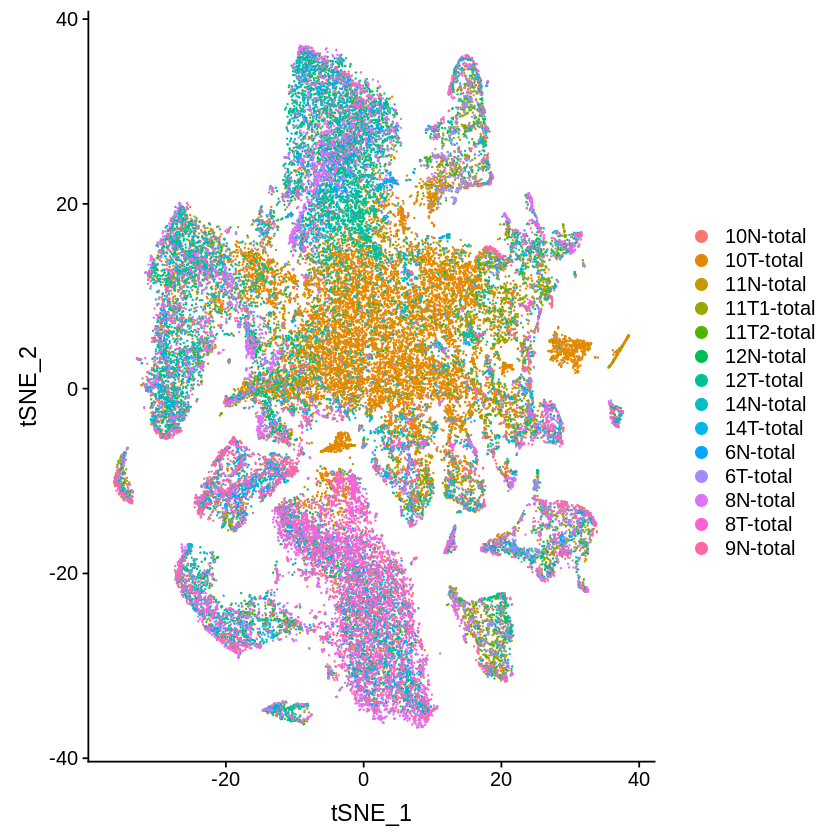

In [24]:
p1 <- DimPlot(object = data.integrated)
plot(p1)